##Biblioteke

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift,BisectingKMeans
from sklearn.cluster import DBSCAN
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.metrics import  adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

##Ucitavanje

In [2]:
url = "https://raw.githubusercontent.com/aleksicmilica/ml-projekat2/main/bank_marketing_dataset.csv"
dataset= pd.read_csv(url)

In [3]:
dataset.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [4]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Predobrada


###Provera prisustva missing values



In [6]:
total_missing = dataset.isnull().sum()
print(total_missing)
if (total_missing == 0).all():
  print("Sve vrednosti su prisutne u dataset-u")

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64
Sve vrednosti su prisutne u dataset-u


###Provera da li su svi podaci odgovarajuceg tipa

In [7]:
irregular_values =  (dataset["duration"] < 0).sum() + (dataset["campaign"] < 0).sum() + (dataset["pdays"] < 0).sum() + (dataset["previous"] < 0).sum() + (dataset["cons.price.idx"] < 0).sum()+ (dataset["euribor3m"] < 0).sum()+ (dataset["nr.employed"] < 0).sum()
print(irregular_values)

0


In [8]:
numerical_type = pd.api.types.is_numeric_dtype(dataset["age"].dtype) and pd.api.types.is_numeric_dtype(dataset["duration"].dtype) and pd.api.types.is_numeric_dtype(dataset["campaign"].dtype) and pd.api.types.is_numeric_dtype(dataset["pdays"].dtype) and pd.api.types.is_numeric_dtype(dataset["previous"].dtype) and pd.api.types.is_numeric_dtype(dataset["emp.var.rate"].dtype)and pd.api.types.is_numeric_dtype(dataset["cons.price.idx"].dtype)and pd.api.types.is_numeric_dtype(dataset["cons.conf.idx"].dtype)and pd.api.types.is_numeric_dtype(dataset["euribor3m"].dtype)and pd.api.types.is_numeric_dtype(dataset["nr.employed"].dtype)
print(numerical_type)

True


In [9]:
if irregular_values == 0 and numerical_type :
  print("Svi podaci su odgovarajuceg tipa")
else:
  print("Podaci nisu odgovarajuceg tipa")

Svi podaci su odgovarajuceg tipa


###Vizuelizacija podataka

In [10]:
columns = dataset.columns
n = len(columns)

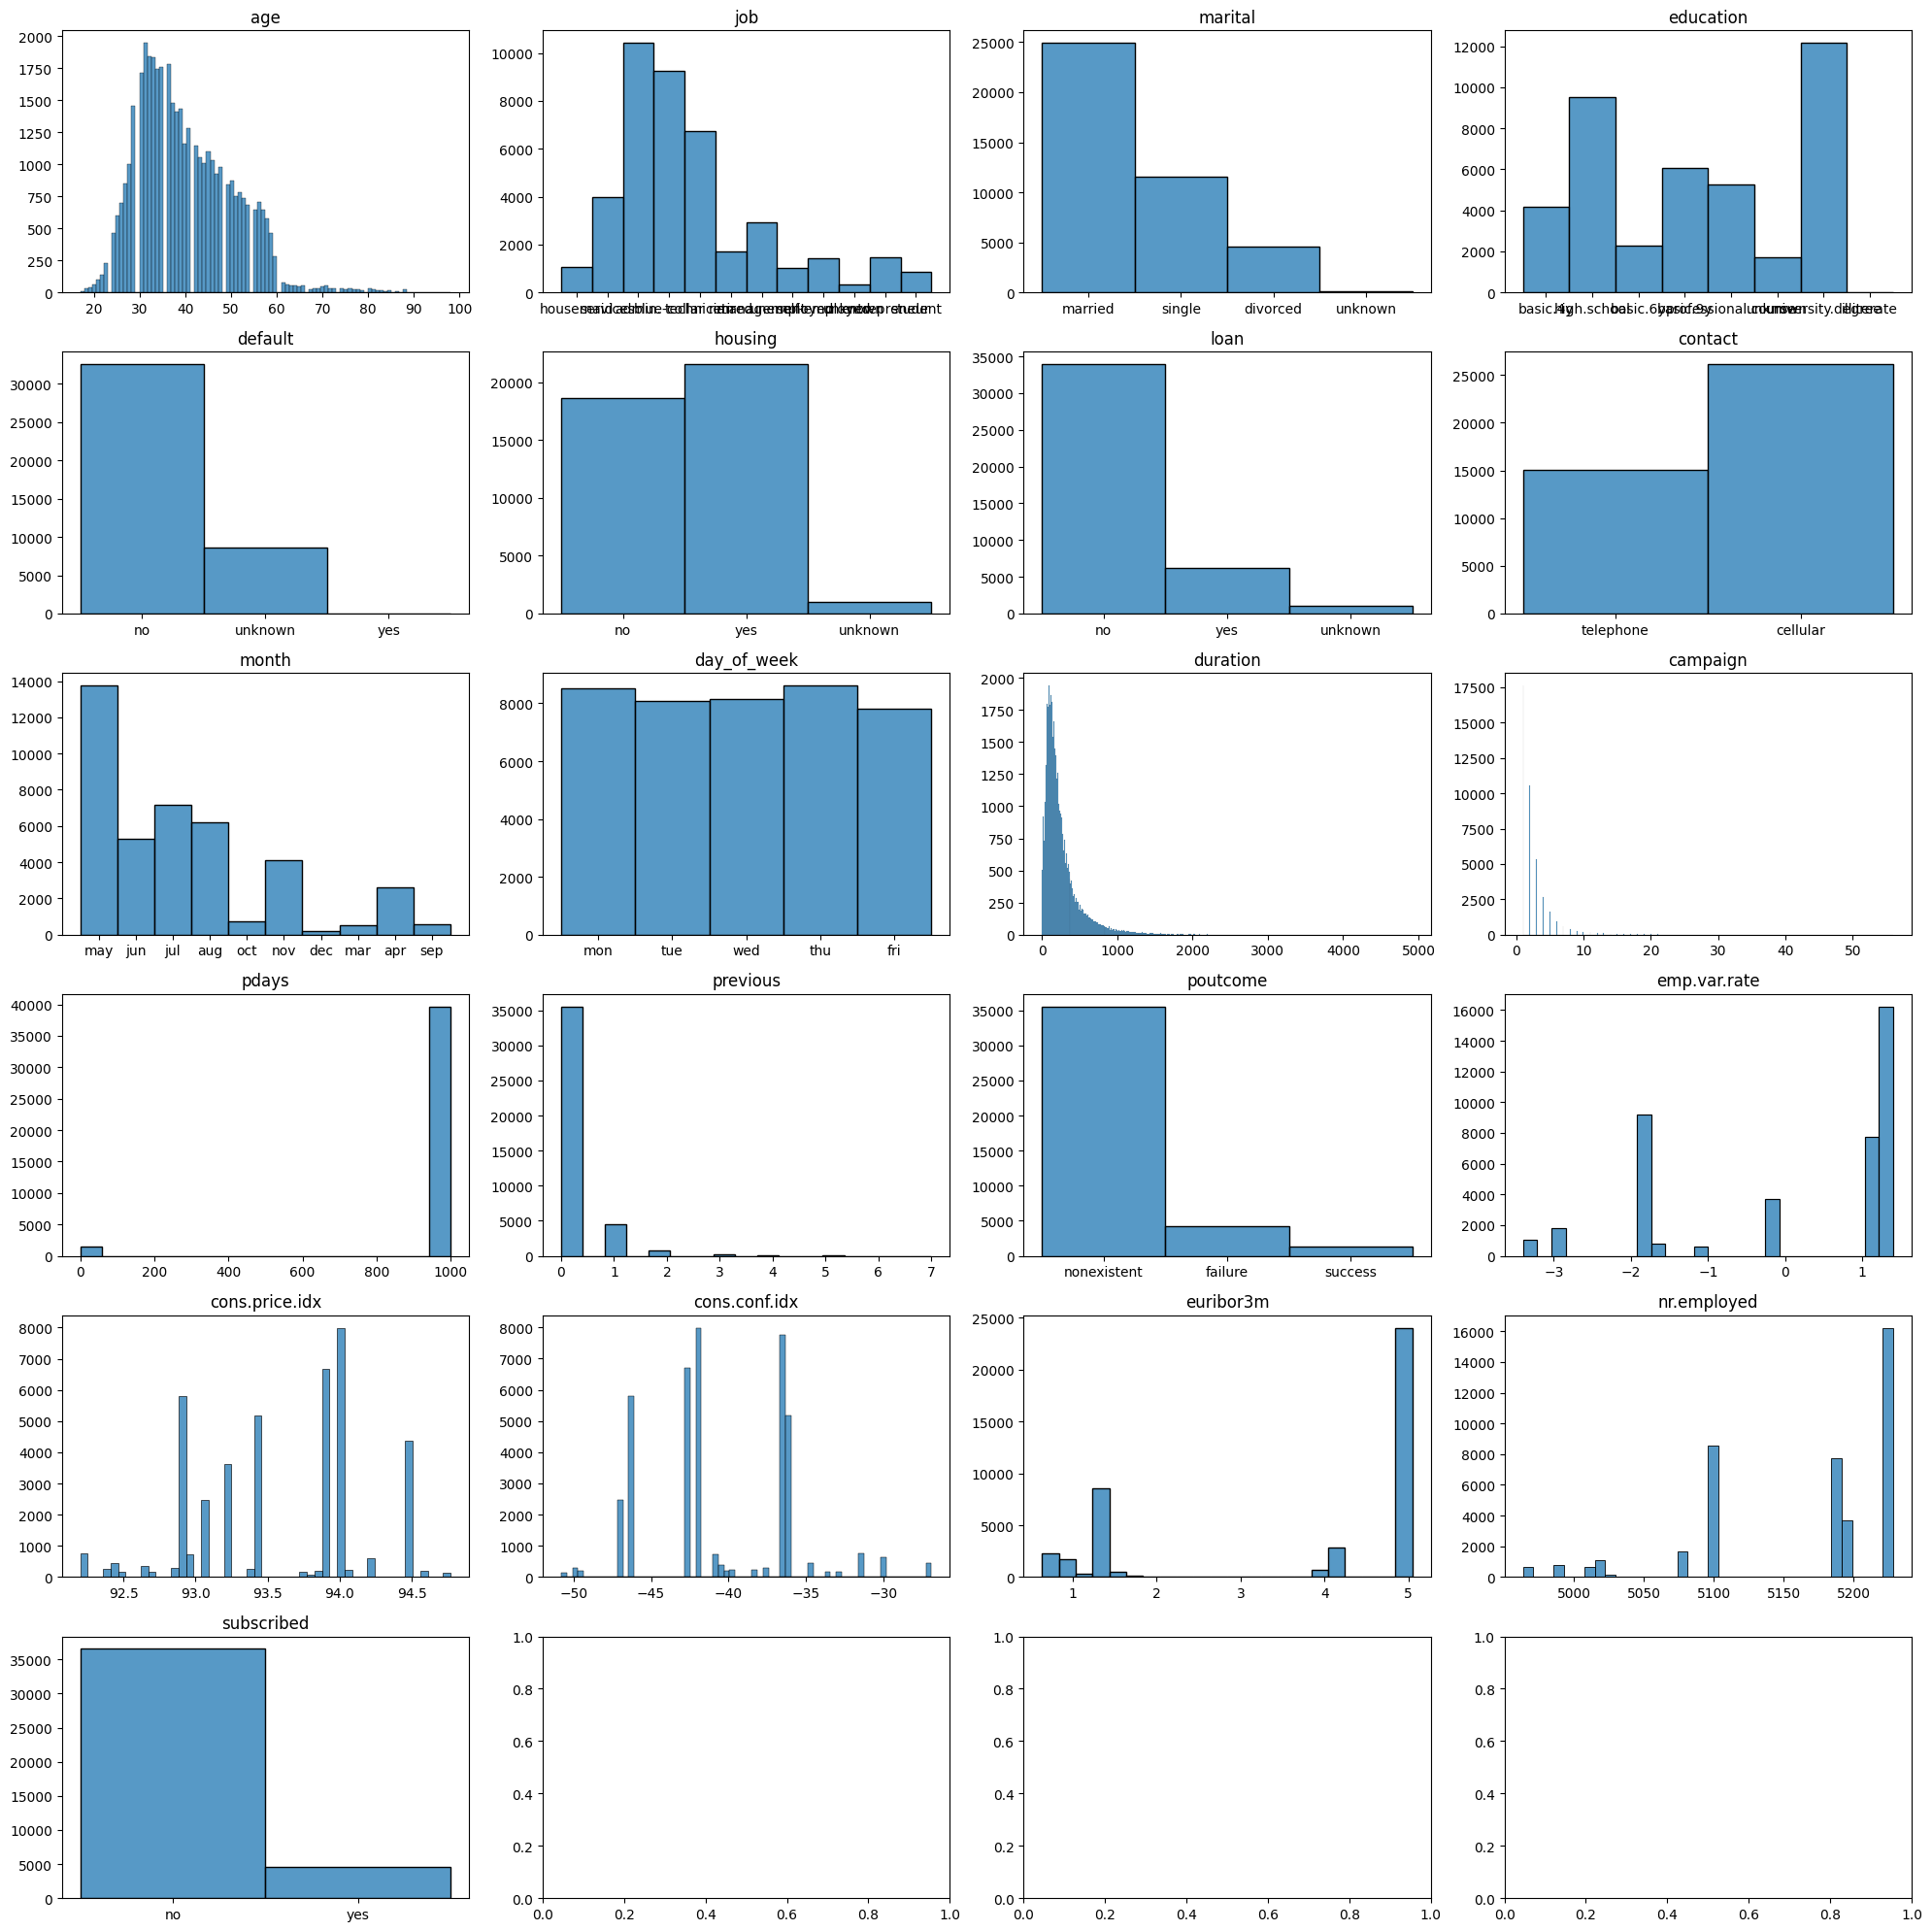

In [11]:
fig, axes = plt.subplots(n//4+1, 4, figsize=(20, 20))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=dataset, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [12]:
dataset_2 = dataset.copy()

#### Labeliranje kategorickih tipova

In [13]:
lista = ["job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "subscribed"]
for el in lista:
  possible_location = dataset[el].unique().tolist()
  # possible_location.insert(0,'nan')
  dict_help ={}
  for i in range(len(possible_location)):
    dict_help[possible_location[i]] = i
  print(dict_help)
  dataset.replace({el:dict_help},inplace = True)
dataset

{'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}
{'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3}
{'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'yes': 1, 'unknown': 2}
{'no': 0, 'yes': 1, 'unknown': 2}
{'telephone': 0, 'cellular': 1}
{'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'mar': 7, 'apr': 8, 'sep': 9}
{'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
{'nonexistent': 0, 'failure': 1, 'success': 2}
{'no': 0, 'yes': 1}


age  job  marital  education  default  housing  loan  contact  month  \
0       56    0        0          0        0        0     0        0      0   
1       57    1        0          1        1        0     0        0      0   
2       37    1        0          1        0        1     0        0      0   
3       40    2        0          2        0        0     0        0      0   
4       56    1        0          1        0        0     1        0      0   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        0          4        0        1     0        1      5   
41184   46    3        0          4        0        0     0        1      5   
41185   56    5        0          6        0        1     0        1      5   
41186   44    4        0          4        0        0     0        1      5   
41187   74    5        0          4        0        1     0        1      5   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                0  ...         1    999         0         0           1.1   
1                0  ...         1    999         0         0           1.1   
2                0  ...         1    999         0         0           1.1   
3                0  ...         1    999         0         0           1.1   
4                0  ...         1    999         0         0           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            4  ...         1    999         0         0          -1.1   
41184            4  ...         1    999         0         0          -1.1   
41185            4  ...         2    999         0         0          -1.1   
41186            4  ...         1    999         0         0          -1.1   
41187            4  ...         3    999         1         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0              93.994          -36.4      4.857       5191.0           0  
1              93.994          -36.4      4.857       5191.0           0  
2              93.994          -36.4      4.857       5191.0           0  
3              93.994          -36.4      4.857       5191.0           0  
4              93.994          -36.4      4.857       5191.0           0  
...               ...            ...        ...          ...         ...  
41183          94.767          -50.8      1.028       4963.6           1  
41184          94.767          -50.8      1.028       4963.6           0  
41185          94.767          -50.8      1.028       4963.6           0  
41186          94.767          -50.8      1.028       4963.6           1  
41187          94.767          -50.8      1.028       4963.6           0  

[41188 rows x 21 columns]

In [14]:
dataset_bckup = dataset.copy()

In [15]:
dataset = dataset_bckup.copy()

Iskoseni podaci normalizuju se primenom logaritma

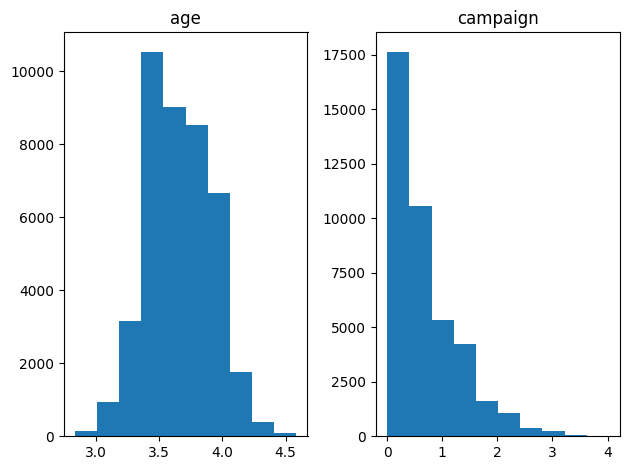

In [16]:
skewed_columns = ["age","campaign"]
fig, axes = plt.subplots(1,2)

for ind,col in enumerate(skewed_columns):
  dataset[col] = np.log(dataset[col])

  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


Umereno iskoseni podaci normalizuju se primenom korena

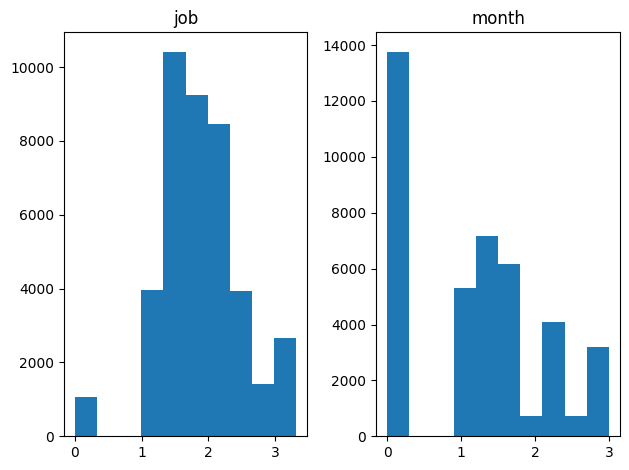

In [17]:
moderate_skewed_columns = ["job","month"]
fig, axes = plt.subplots(1,2)

for ind,col in enumerate(moderate_skewed_columns):
  dataset[col] = np.sqrt(dataset[col])

  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


Ostali numericki podaci standardizuju se

In [18]:
scaler = StandardScaler()
normalize_columns = ["education" , "duration", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
# normalize_columns = ["education","duration"]
normalized_data= scaler.fit_transform(dataset[normalize_columns])
dataset[normalize_columns] = normalized_data


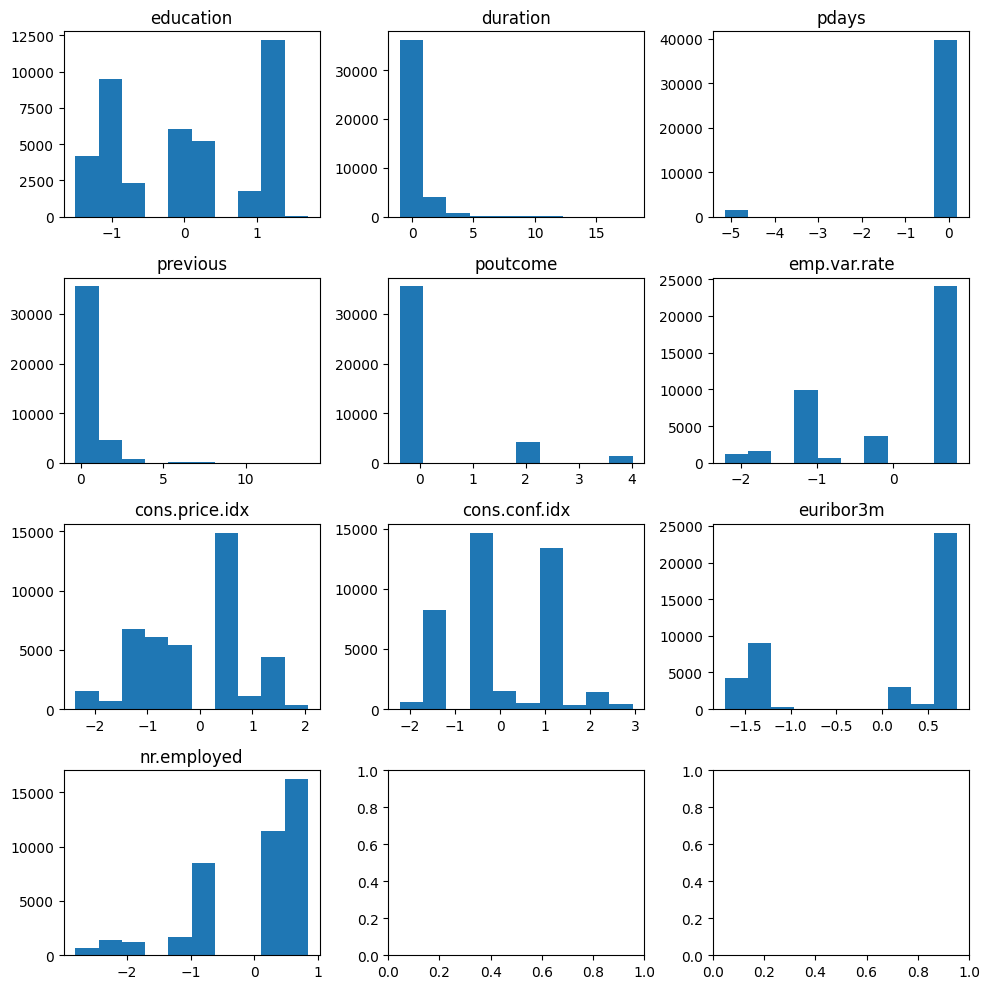

In [19]:
fig, axes = plt.subplots(4,3,figsize=(10,10))
axes = axes.flatten()
for ind,col in enumerate(normalize_columns):
  axes[ind].hist(dataset[col])
  axes[ind].set_title(col)
  axes[ind].set_xlabel('')
  axes[ind].set_ylabel('')

plt.tight_layout()
plt.show()


### Detekcija i otklanjanje outlier-a, normalizacija podataka

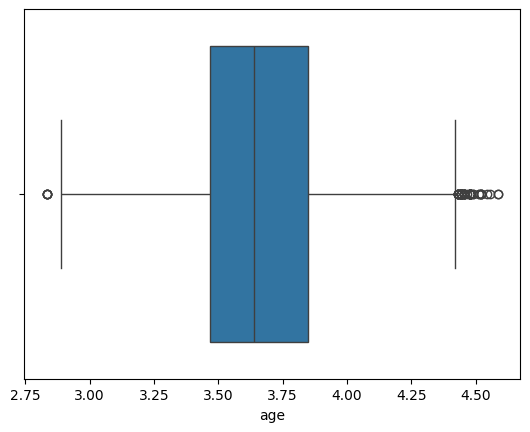

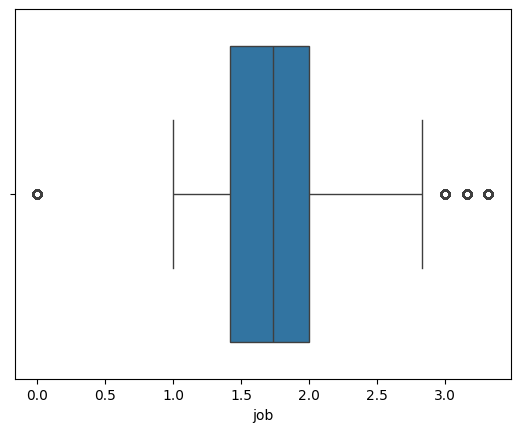

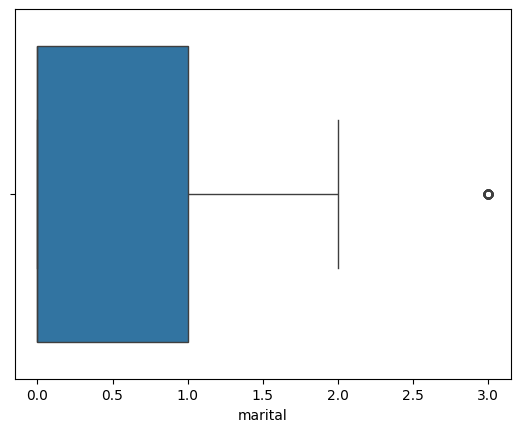

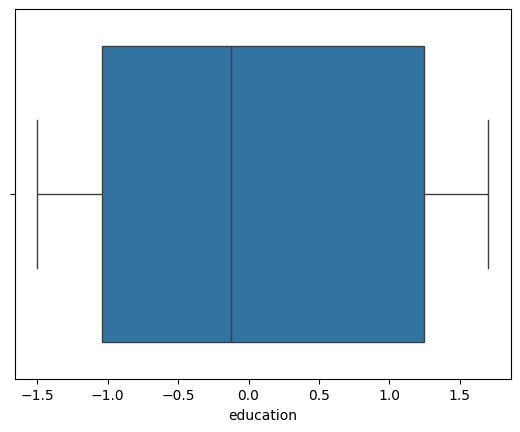

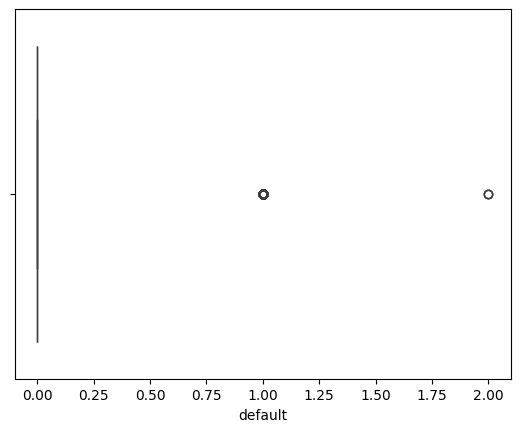

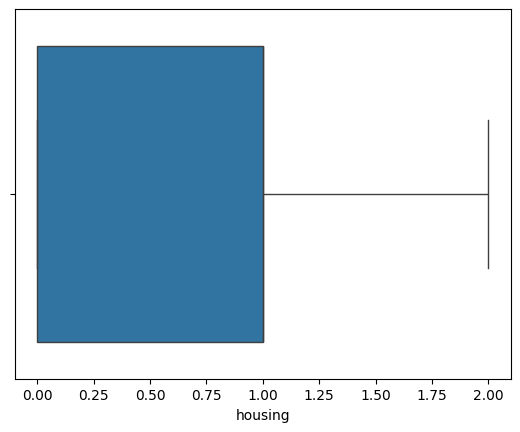

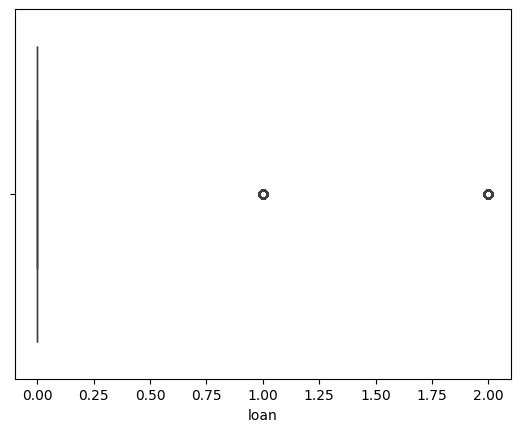

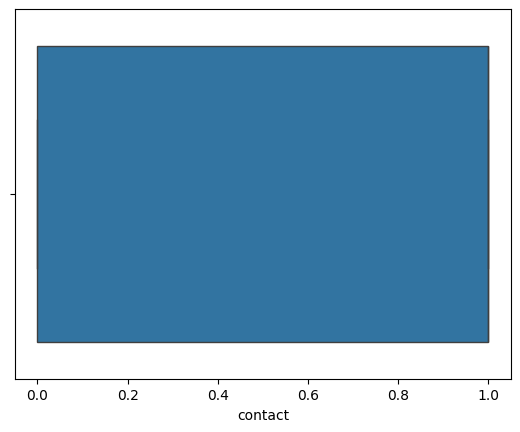

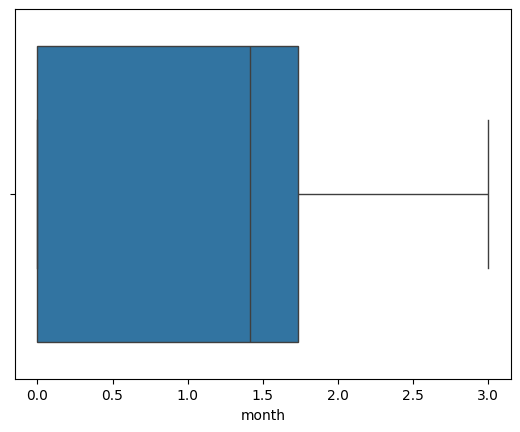

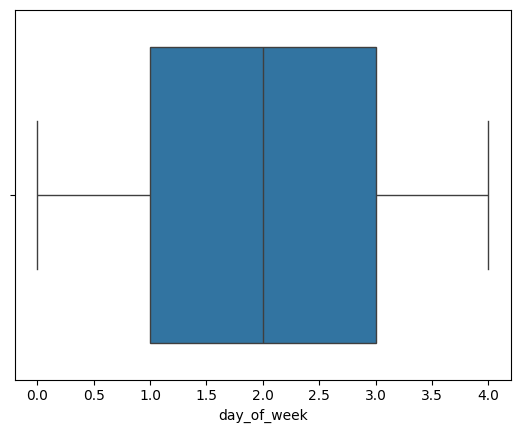

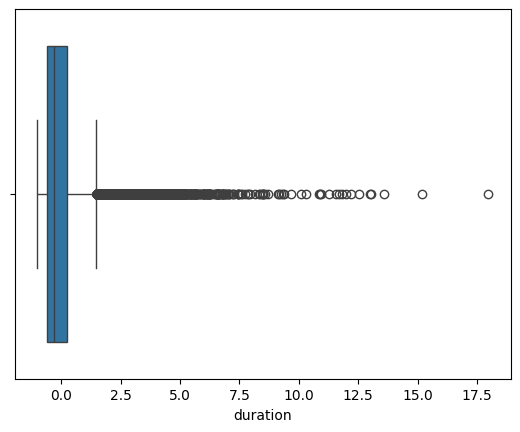

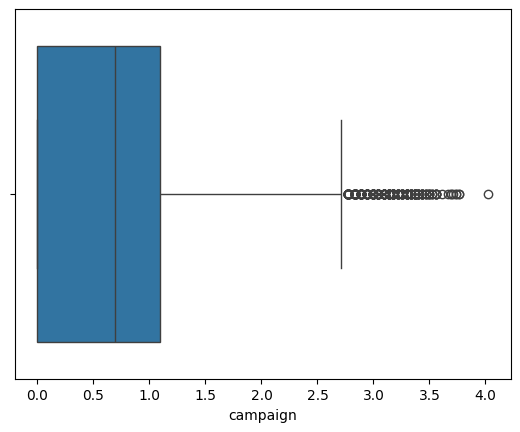

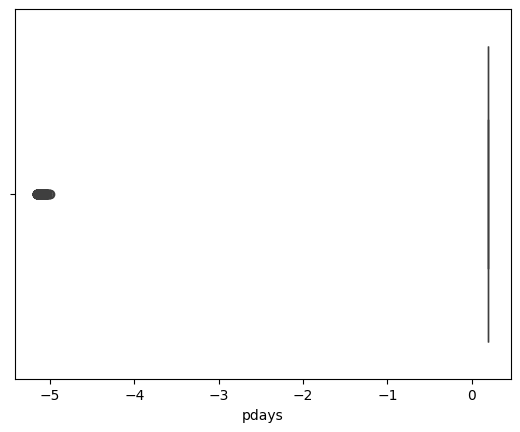

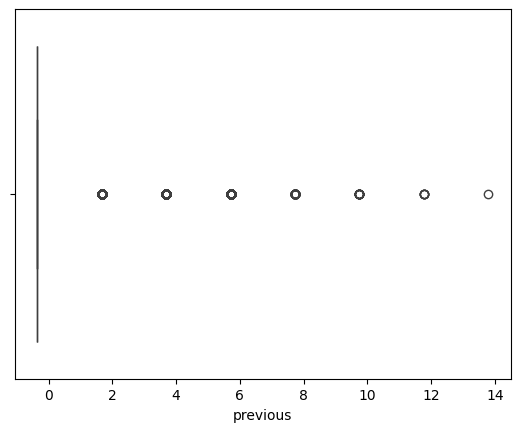

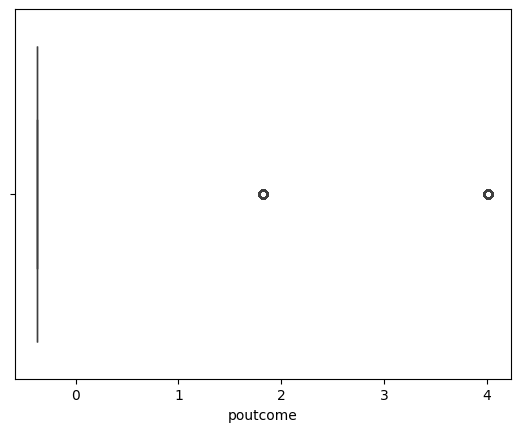

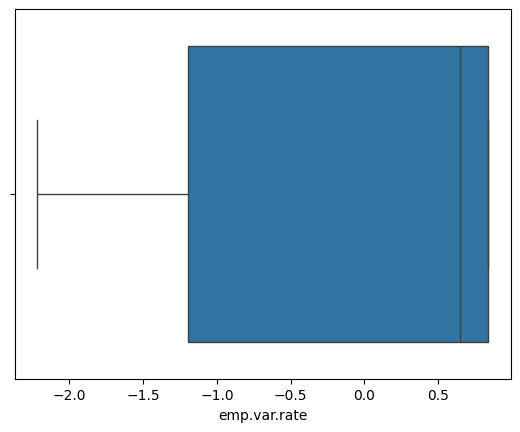

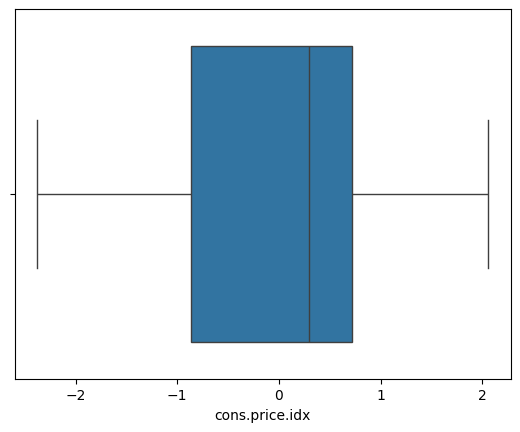

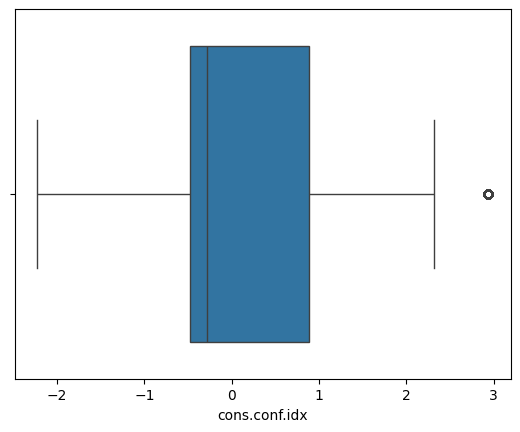

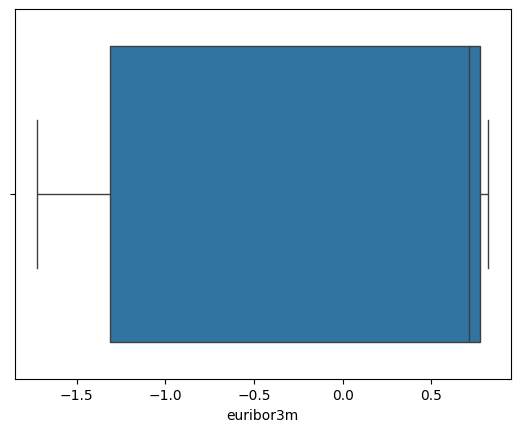

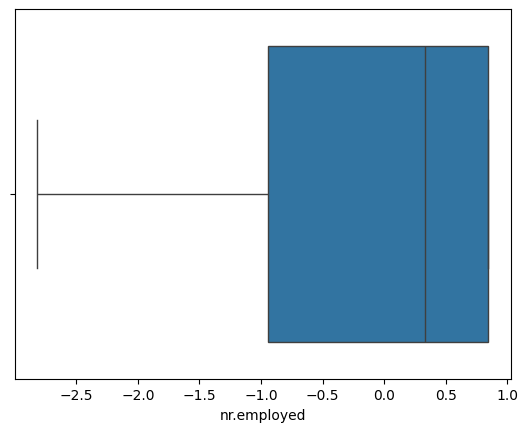

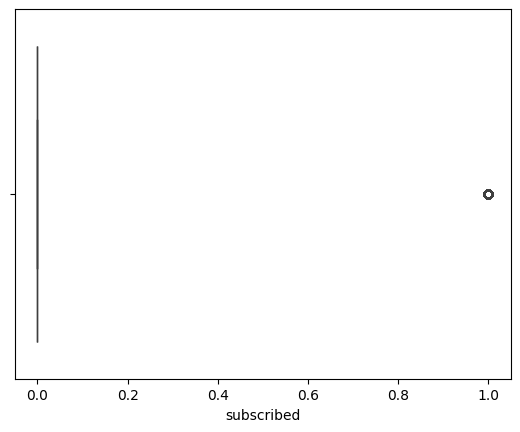

In [20]:
lista = ["age", "job","marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "subscribed"]
for el in lista:
  sns.boxplot(x = dataset[el])
  plt.show()

####Druga varijanta dataseta

Kategoricki podaci kod kojih je jasno zastoupljenija jedna kategorija u odnosu na sve ostale transformisu se tako da imaju samo 2 moguce vrednosti

In [21]:
lista = ["marital", "default", "loan","poutcome"]
dataset_2 = dataset.copy()
for ind,el in enumerate(lista):
  dataset_2[el] = np.where(dataset_2[el] == 0, 0, 1)
dataset_2

age       job  marital  education  default  housing  loan  \
0      4.025352  0.000000        0  -1.499673        0        0     0   
1      4.043051  1.000000        0  -1.042111        1        0     0   
2      3.610918  1.000000        0  -1.042111        0        1     0   
3      3.688879  1.414214        0  -0.584550        0        0     0   
4      4.025352  1.000000        0  -1.042111        0        0     1   
...         ...       ...      ...        ...      ...      ...   ...   
41183  4.290459  2.236068        0   0.330573        0        1     0   
41184  3.828641  1.732051        0   0.330573        0        0     0   
41185  4.025352  2.236068        0   1.245696        0        1     0   
41186  3.784190  2.000000        0   0.330573        0        0     0   
41187  4.304065  2.236068        0   0.330573        0        1     0   

       contact     month  day_of_week  ...  campaign     pdays  previous  \
0            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
1            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
2            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
3            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
4            0  0.000000            0  ...  0.000000  0.195414 -0.349494   
...        ...       ...          ...  ...       ...       ...       ...   
41183        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41184        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41185        1  2.236068            4  ...  0.693147  0.195414 -0.349494   
41186        1  2.236068            4  ...  0.000000  0.195414 -0.349494   
41187        1  2.236068            4  ...  1.098612  0.195414  1.671136   

       poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0             1      0.648092        0.722722       0.886447   0.712460   
1             1      0.648092        0.722722       0.886447   0.712460   
2             1      0.648092        0.722722       0.886447   0.712460   
3             1      0.648092        0.722722       0.886447   0.712460   
4             1      0.648092        0.722722       0.886447   0.712460   
...         ...           ...             ...            ...        ...   
41183         1     -0.752343        2.058168      -2.224953  -1.495186   
41184         1     -0.752343        2.058168      -2.224953  -1.495186   
41185         1     -0.752343        2.058168      -2.224953  -1.495186   
41186         1     -0.752343        2.058168      -2.224953  -1.495186   
41187         1     -0.752343        2.058168      -2.224953  -1.495186   

       nr.employed  subscribed  
0         0.331680           0  
1         0.331680           0  
2         0.331680           0  
3         0.331680           0  
4         0.331680           0  
...            ...         ...  
41183    -2.815697           1  
41184    -2.815697           0  
41185    -2.815697           0  
41186    -2.815697           1  
41187    -2.815697           0  

[41188 rows x 21 columns]

# **ALGORITMI**

In [22]:
def eval_metrics(X,labels):
  silhouette = silhouette_score(X, labels)
  ch_index = calinski_harabasz_score(X,labels)
  db_index = davies_bouldin_score(X, labels)
  return (silhouette,db_index,ch_index)

In [23]:
def visualise_3d_data( datas, cluster_labels, n_clusters):
  pca = PCA(n_components=3)
  PCs = pd.DataFrame(pca.fit_transform(datas))
  PCs.columns = ["PC1","PC2","PC3"]
  PCs["cluster"] = cluster_labels
  cluster = []
  trace = []
  for i in range(n_clusters):
    cluster.append(PCs[PCs["cluster"]==i])
    trace.append (go.Scatter3d(
                    x = cluster[i]["PC1"],
                    y = cluster[i]["PC2"],
                    z = cluster[i]["PC3"],
                    mode = "markers",
                    name = "Cluster "+str(i),
                    # marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None))


  title = "Vizuelizacija klastera u 3D pomocu 3 PCA komponente"

  layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

  fig = dict(data = trace, layout = layout)

  iplot(fig)

In [24]:
def visualise_2d_data(datas, cluster_labels, n_clusters):
  pcas=PCA(n_components=2).fit_transform(datas)
  df2=pd.DataFrame(pcas,columns=['PC1','PC2'])
  sns.scatterplot(data=df2, x="PC1", y="PC2", hue=(cluster_labels+1))
  plt.title("Vizuelizacija klastera u 2d pomocu 2 PCA komponente")
  plt.show()

In [25]:
pcas=PCA(n_components=2).fit_transform(dataset)
df2=pd.DataFrame(pcas,columns=['PC1','PC2'])

In [26]:
def printFeatureImportance(df, pred, centers = None):

    if centers is None:
        cluster_means = df.groupby(pred).mean()
    else:
        cluster_means = centers

    fig, ax = plt.subplots(figsize=(16, 6))
    cluster_means.T.plot(kind='bar', ax=ax, cmap='plasma')
    plt.title('Feature importance')
    plt.show()

## Kmeans

####Odredjivanje broja klastera

In [27]:
from scipy.spatial.distance import cdist
inertias = []
mapping2 = {}
K = range(1, 12)
distortions = []
mapping1 = {}
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dataset.shape[0])
    mapping1[k] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / dataset.shape[0]
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

In [28]:
print("Vrednosti distrozije po broj klastera")
for key, val in mapping1.items():
    print(f'{key} : {val}')

Vrednosti distrozije po broj klastera
1 : 3.6913650287156656
2 : 3.195397659473886
3 : 3.0337668694656728
4 : 2.854440107706939
5 : 2.7573355324683564
6 : 2.6768714773642075
7 : 2.6076204759999184
8 : 2.5555242327853667
9 : 2.506167610990432
10 : 2.4612022069180175
11 : 2.4125094232084505


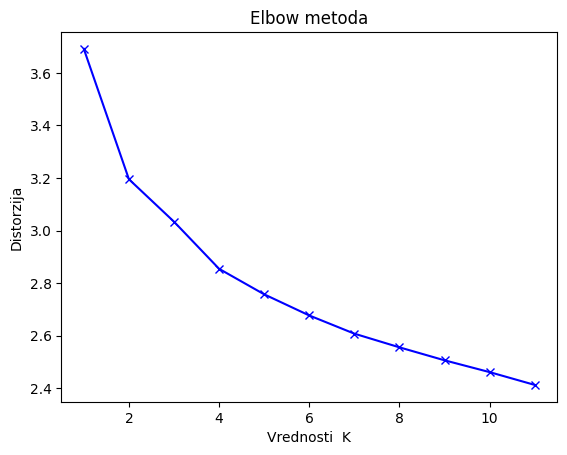

In [29]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Vrednosti  K')
plt.ylabel('Distorzija')
plt.title('Elbow metoda')
plt.show()

In [30]:
print("Vrednosti inercije po broj klastera")
for key, val in mapping2.items():
    print(f'{key} : {val}')

Vrednosti inercije po broj klastera
1 : 631425.3405406944
2 : 474669.1279857573
3 : 407115.17265450803
4 : 367195.09307091916
5 : 339662.1240076279
6 : 324003.9517890938
7 : 305634.40413226635
8 : 293676.15158675454
9 : 281434.2349200344
10 : 271443.97278337204
11 : 262839.81831405795


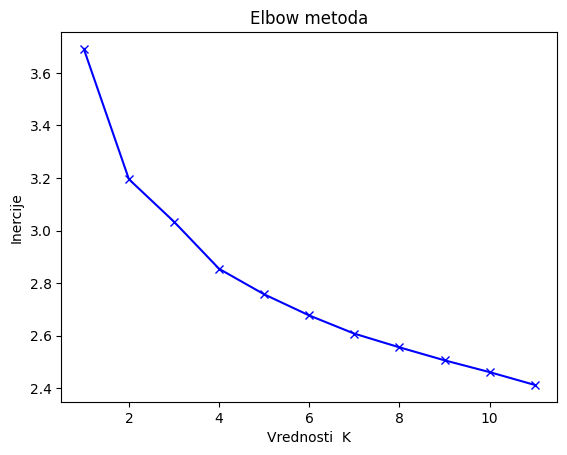

In [31]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Vrednosti  K')
plt.ylabel('Inercije')
plt.title('Elbow metoda')
plt.show()

#### Klasterovanje

Prvo se vrsi klasterovanje neredukovanog seta podataka u 4 klastera

In [32]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df = pd.DataFrame()



Silhouette Score : 0.17114653033315932 Davies-Bouldin Index: 1.65000937411862Calinski-Harabasz Index: 9862.011660070055


In [33]:
results_df.loc["KMeans","Silhouette Score"] = results[0]

In [34]:
visualise_3d_data(dataset,cluster_labels,4)

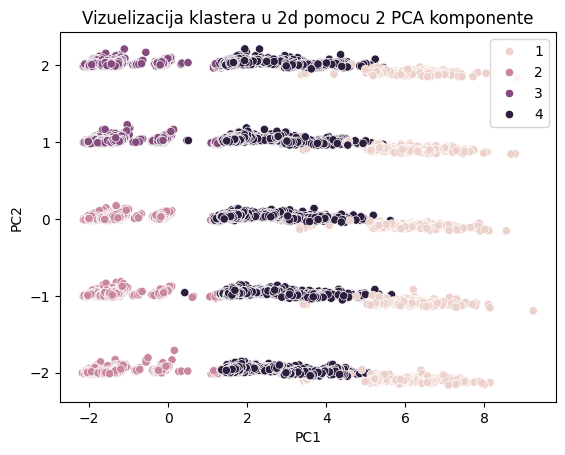

In [35]:
visualise_2d_data(dataset,cluster_labels,4)

In [36]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)

In [37]:
clustering_dataframe = pd.DataFrame(counts)

In [38]:
clustering_dataframe.columns = ["KMeans"]

In [39]:
results_df

Silhouette Score
KMeans          0.171147

In [40]:
clustering_dataframe

KMeans
0    1537
1   16652
2   10845
3   12154

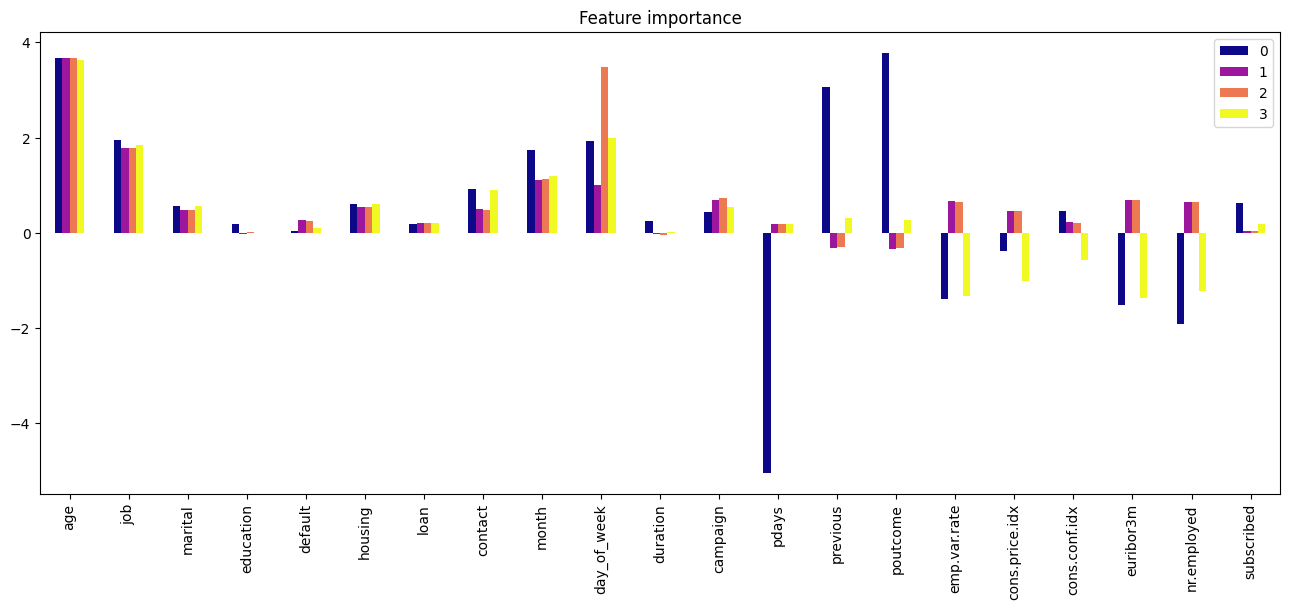

In [41]:
printFeatureImportance(dataset, cluster_labels)

Na osnovu uticaja svakog ficera za svaki klaster, odbacuju se kolone **education**,**default**,**loan**,**duration**,**subscribed**, i vrsi klasterovanje u 4 klastera

In [42]:
dataset_3 = dataset.copy()
delete_columns = ["education","default","loan","duration","subscribed"]
dataset_3.drop(delete_columns,axis=1,inplace=True)


In [43]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset_3)
results = eval_metrics(dataset_3,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_kolone_KMeans",:] = results[0]

Silhouette Score : 0.21905577735050674 Davies-Bouldin Index: 1.3776859463120819Calinski-Harabasz Index: 13567.142893603963


In [44]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_Kmeans"] = counts

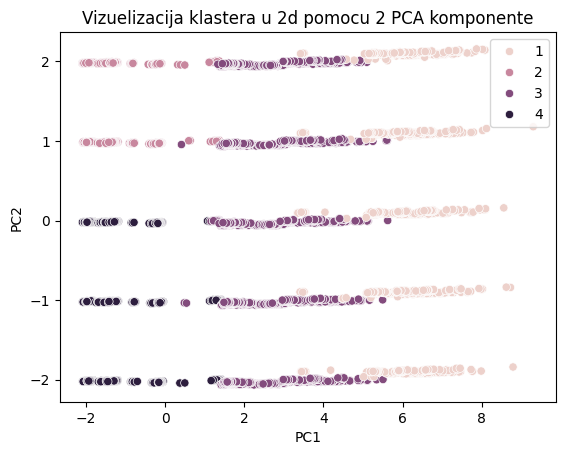

In [45]:
pcas=PCA(n_components=2).fit_transform(dataset_3)
dataset_3_pca=pd.DataFrame(pcas,columns=['PC1','PC2'])
visualise_2d_data(dataset_3_pca,cluster_labels,4)

Izvrsena je PCA redukcija za redukovani set podataka, nakon cega se vrsi klasterovanje podataka u 4 grupe.

In [46]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset_3_pca)
results = eval_metrics(dataset_3_pca,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_PCA_KMeans",:] = results[0]

Silhouette Score : 0.5198752896108609 Davies-Bouldin Index: 0.8075172260055952Calinski-Harabasz Index: 53202.08871939428


In [47]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_PCA_Kmeans"] = counts

Na kraju je istim algoritmom klasterovan polazni set podataka nakon PCA redukcije u 4 klastera.

In [48]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["PCA_KMeans",:] = results[0]

Silhouette Score : 0.5172239943083106 Davies-Bouldin Index: 0.8238340653763321Calinski-Harabasz Index: 52865.5266060788


In [49]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_Kmeans"] = counts

In [50]:
results_df

Silhouette Score
KMeans                            0.171147
Najbitnije_kolone_KMeans          0.219056
Najbitnije_PCA_KMeans             0.519875
PCA_KMeans                        0.517224

In [51]:
clustering_dataframe

KMeans  Najbitnije_Kmeans  Najbitnije_PCA_Kmeans  PCA_Kmeans
0    1537               1541                  10821       10822
1   16652              11102                   5783        6143
2   10845              12146                  16136       16136
3   12154              16399                   8448        8087

##Bisecting K-means

In [52]:
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["BisectingKMeans",:] = results[0]

Silhouette Score : 0.1635755840390671 Davies-Bouldin Index: 1.6770112397349854Calinski-Harabasz Index: 9796.98105156303


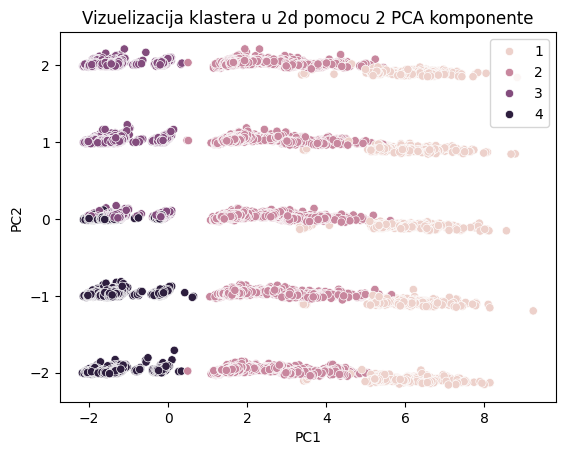

In [53]:
visualise_2d_data(dataset,cluster_labels,4)
visualise_3d_data(dataset,cluster_labels,4)

In [54]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Bisecting Kmeans"] = counts

In [55]:
results_df

Silhouette Score
KMeans                            0.171147
Najbitnije_kolone_KMeans          0.219056
Najbitnije_PCA_KMeans             0.519875
PCA_KMeans                        0.517224
BisectingKMeans                   0.163576

In [56]:
clustering_dataframe

KMeans  Najbitnije_Kmeans  Najbitnije_PCA_Kmeans  PCA_Kmeans  \
0    1537               1541                  10821       10822   
1   16652              11102                   5783        6143   
2   10845              12146                  16136       16136   
3   12154              16399                   8448        8087   

   Bisecting Kmeans  
0              1534  
1             12700  
2             13013  
3             13941

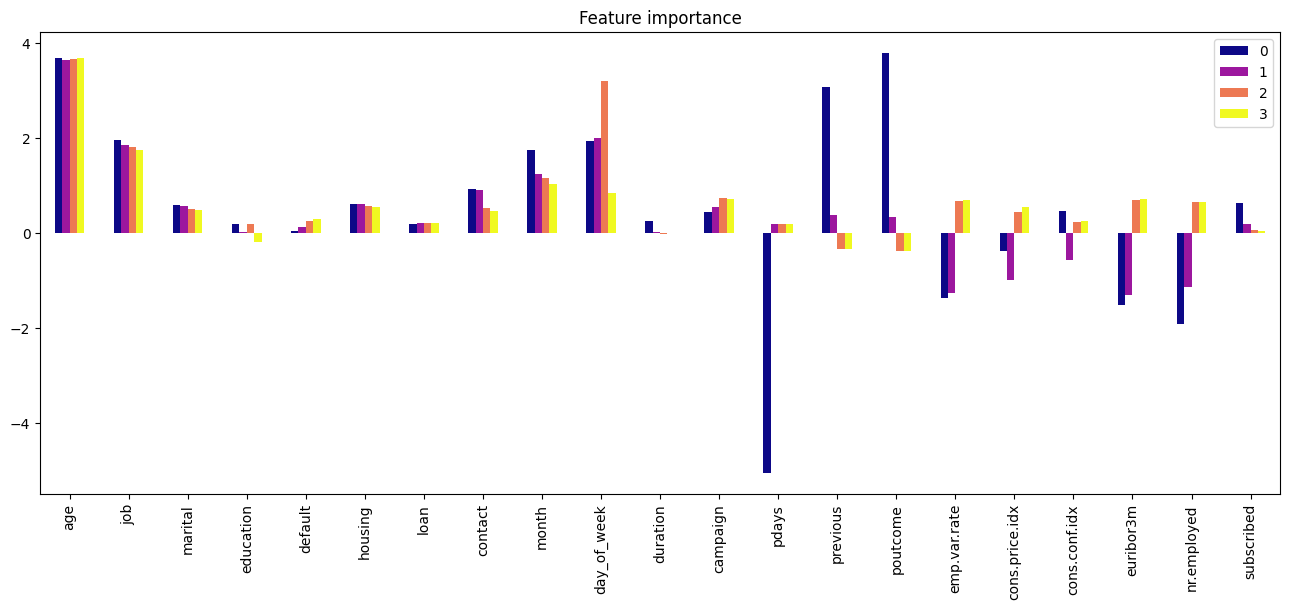

In [57]:
printFeatureImportance(dataset, cluster_labels)

Na osnovu prikaza uticaja svakog ficera za svaki klaster izbacuju se kolone **education**, **default**, **loan** i **duration**, pa se vrsi klasterovanje za dobijeni set podataka

In [58]:
dataset_4 = dataset.copy()
dataset_4.drop(["education","default","loan","duration"],axis =1,inplace = True)
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(dataset_4)
results = eval_metrics(dataset_4,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_BisectingKMeans",:] = results[0]
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_BisectingKMeans"] = counts

Silhouette Score : 0.20844716771499355 Davies-Bouldin Index: 1.4080440435805721Calinski-Harabasz Index: 13286.495522703544


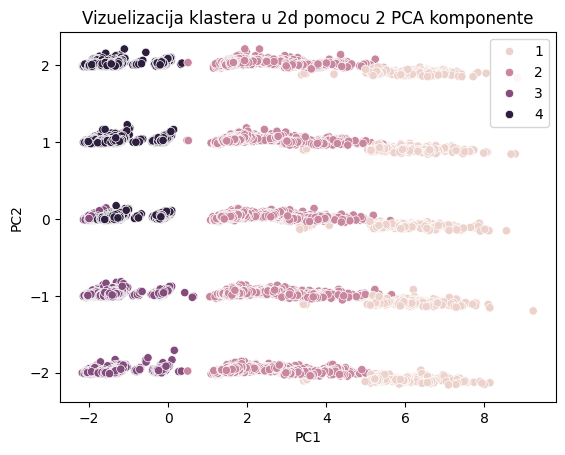

In [59]:
visualise_2d_data(dataset,cluster_labels,4)

Izvrsena je redukcija novodobijenog seta podataka na 2 glavne komponenete PCA metodom.

In [60]:
pcas=PCA(n_components=2).fit_transform(dataset_4)
dataset_4_pca=pd.DataFrame(pcas,columns=['PC1','PC2'])
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(dataset_4_pca)
results = eval_metrics(dataset_4_pca,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_PCA_BisectingKMeans",:] = results[0]
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_PCA_BisectingKMeans"] = counts

Silhouette Score : 0.5158424202482829 Davies-Bouldin Index: 0.8319366775858243Calinski-Harabasz Index: 52415.54121833599


Izvrseno je klasterovanje nakon originalong redukcije primenom PCA metode na 2 komponente.

In [61]:
bisectingkmeans = BisectingKMeans(n_clusters =4)
cluster_labels = bisectingkmeans.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["PCA_BisectingKMeans",:] = results[0]

Silhouette Score : 0.512936777229905 Davies-Bouldin Index: 0.8340137361907445Calinski-Harabasz Index: 52175.537242845814


In [62]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_BisectingKMeans"] = counts

In [63]:
results_df

Silhouette Score
KMeans                                  0.171147
Najbitnije_kolone_KMeans                0.219056
Najbitnije_PCA_KMeans                   0.519875
PCA_KMeans                              0.517224
BisectingKMeans                         0.163576
Najbitnije_BisectingKMeans              0.208447
Najbitnije_PCA_BisectingKMeans          0.515842
PCA_BisectingKMeans                     0.512937

##Gaussian Mixture

In [64]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 4,random_state=42)

In [65]:
cluster_labels = gmm.fit_predict(dataset)
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Gaussian Mixture",:] = results[0]

Silhouette Score : 0.09975477726149581 Davies-Bouldin Index: 3.3015872624880185Calinski-Harabasz Index: 7460.016926791017


In [66]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Gaussian Mixture"] = counts

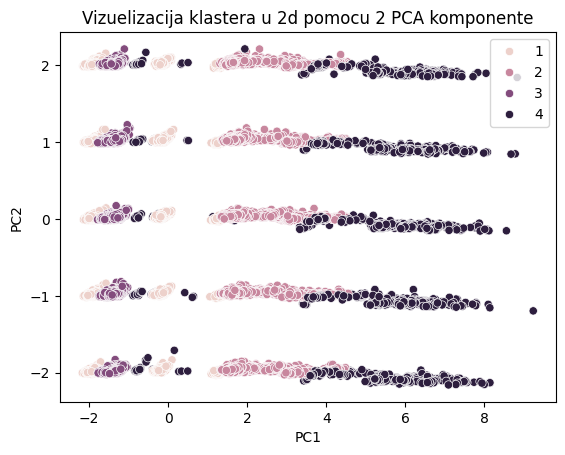

In [67]:
visualise_2d_data(dataset,cluster_labels,4)

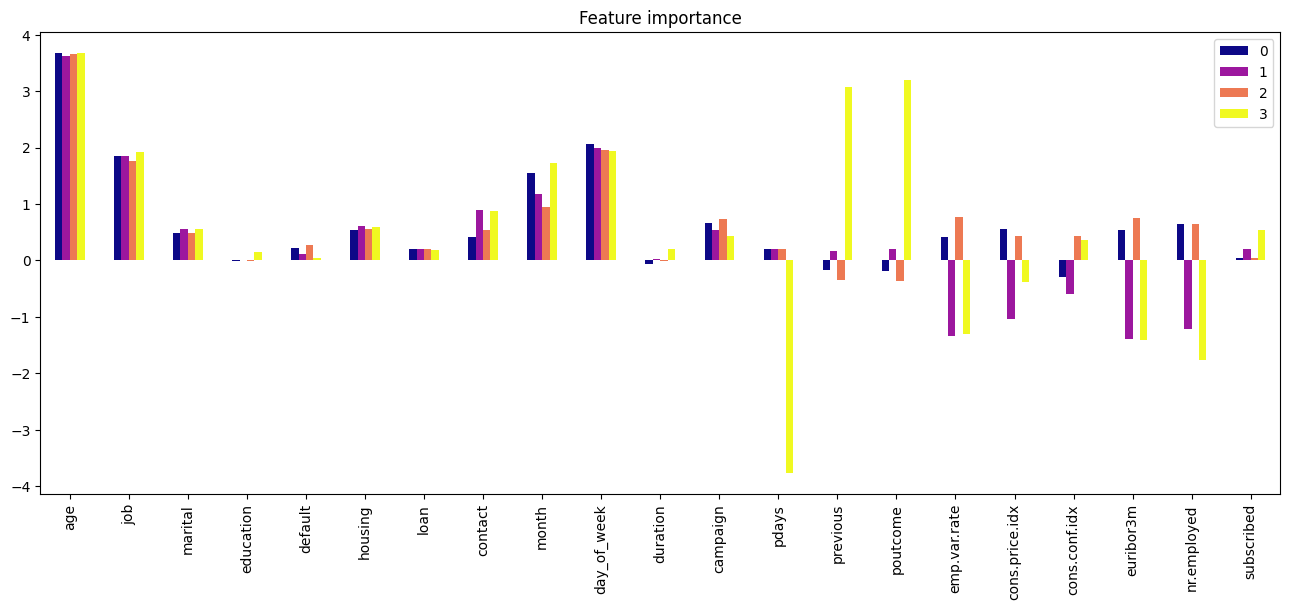

In [68]:
printFeatureImportance(dataset, cluster_labels)

Na osnovu prikazanog uticaja ficera na klastere izbacuju se **education**, **default**, **loan**, **duration**. Vrsi se klasterovanje novodobijenog dataseta.

In [69]:
dataset_5 = dataset.copy()
dataset_5.drop(["education","default","loan","duration"],axis =1, inplace = True)
cluster_labels = gmm.fit_predict(dataset_5)
results = eval_metrics(dataset_5,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_Gaussian_Mixture",:] = results[0]

Silhouette Score : 0.12713395035214892 Davies-Bouldin Index: 2.329832381913431Calinski-Harabasz Index: 10306.446779961354


In [70]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_Gaussian_Mixture"] = counts

Nakon toga se vrsi redukcija dimenzionalnosti PCA metodom na 2 komponente i klasterizacija

In [71]:
pcas=PCA(n_components=2).fit_transform(dataset_5)
dataset_5_pca=pd.DataFrame(pcas,columns=['PC1','PC2'])
cluster_labels = gmm.fit_predict(dataset_5_pca)
results = eval_metrics(dataset_5_pca,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_PCA_Gaussian_Mixture",:] = results[0]
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["Najbitnije_PCA_Gaussian_Mixture"] = counts

Silhouette Score : 0.46328132173778425 Davies-Bouldin Index: 0.6972159159809895Calinski-Harabasz Index: 38306.47305693685


Na kraju se izvrsava klasterizacija ovom metodom za polazni dataset koji je redukovan na dve glavne komponente PCA metodom

In [72]:
cluster_labels = gmm.fit_predict(df2)
results = eval_metrics(df2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["PCA_Gaussian Mixture",:] = results[0]

Silhouette Score : 0.46546688598306035 Davies-Bouldin Index: 0.8838661416398568Calinski-Harabasz Index: 38707.137751568815


In [73]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
clustering_dataframe["PCA_Gaussian Mixture"] = counts

In [74]:
results_df

Silhouette Score
KMeans                                   0.171147
Najbitnije_kolone_KMeans                 0.219056
Najbitnije_PCA_KMeans                    0.519875
PCA_KMeans                               0.517224
BisectingKMeans                          0.163576
Najbitnije_BisectingKMeans               0.208447
Najbitnije_PCA_BisectingKMeans           0.515842
PCA_BisectingKMeans                      0.512937
Gaussian Mixture                         0.099755
Najbitnije_Gaussian_Mixture              0.127134
Najbitnije_PCA_Gaussian_Mixture          0.463281
PCA_Gaussian Mixture                     0.465467

In [75]:
clustering_dataframe

KMeans  Najbitnije_Kmeans  Najbitnije_PCA_Kmeans  PCA_Kmeans  \
0    1537               1541                  10821       10822   
1   16652              11102                   5783        6143   
2   10845              12146                  16136       16136   
3   12154              16399                   8448        8087   

   Bisecting Kmeans  Najbitnije_BisectingKMeans  \
0              1534                        1530   
1             12700                       12704   
2             13013                       13326   
3             13941                       13628   

   Najbitnije_PCA_BisectingKMeans  PCA_BisectingKMeans  Gaussian Mixture  \
0                            6246                 7972              7931   
1                            7986                 6259             11603   
2                           10820                16136             19623   
3                           16136                10821              2031   

   Najbitnije_Gaussian_Mixture  Najbitnije_PCA_Gaussian_Mixture  \
0                         5901                             9756   
1                        11707                            15631   
2                        21651                            14241   
3                         1929                             1560   

   PCA_Gaussian Mixture  
0                  9756  
1                  7315  
2                 14241  
3                  9876

## DBSCAN

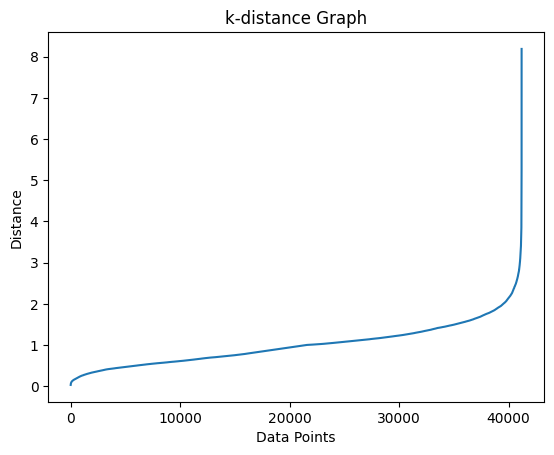

In [76]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
distances, indices = neigh.fit(dataset).kneighbors(dataset)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('k-distance Graph')
plt.show()

In [77]:
dbscan = DBSCAN(eps = 2.75, n_jobs=-1)
cluster_labels = dbscan.fit_predict(dataset)
max(cluster_labels)

3

In [78]:
results = eval_metrics(dataset,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["DBSCAN",:] = results[0]

Silhouette Score : 0.2389458490253637 Davies-Bouldin Index: 1.968267519982127Calinski-Harabasz Index: 3303.7085306796844


In [79]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
unique_values

array([-1,  0,  1,  2,  3])

In [80]:
clustering_dataframe["DBSCAN"] = counts[1:5]

In [81]:
results_df

Silhouette Score
KMeans                                   0.171147
Najbitnije_kolone_KMeans                 0.219056
Najbitnije_PCA_KMeans                    0.519875
PCA_KMeans                               0.517224
BisectingKMeans                          0.163576
Najbitnije_BisectingKMeans               0.208447
Najbitnije_PCA_BisectingKMeans           0.515842
PCA_BisectingKMeans                      0.512937
Gaussian Mixture                         0.099755
Najbitnije_Gaussian_Mixture              0.127134
Najbitnije_PCA_Gaussian_Mixture          0.463281
PCA_Gaussian Mixture                     0.465467
DBSCAN                                   0.238946

In [82]:
clustering_dataframe

KMeans  Najbitnije_Kmeans  Najbitnije_PCA_Kmeans  PCA_Kmeans  \
0    1537               1541                  10821       10822   
1   16652              11102                   5783        6143   
2   10845              12146                  16136       16136   
3   12154              16399                   8448        8087   

   Bisecting Kmeans  Najbitnije_BisectingKMeans  \
0              1534                        1530   
1             12700                       12704   
2             13013                       13326   
3             13941                       13628   

   Najbitnije_PCA_BisectingKMeans  PCA_BisectingKMeans  Gaussian Mixture  \
0                            6246                 7972              7931   
1                            7986                 6259             11603   
2                           10820                16136             19623   
3                           16136                10821              2031   

   Najbitnije_Gaussian_Mixture  Najbitnije_PCA_Gaussian_Mixture  \
0                         5901                             9756   
1                        11707                            15631   
2                        21651                            14241   
3                         1929                             1560   

   PCA_Gaussian Mixture  DBSCAN  
0                  9756   35527  
1                  7315    4069  
2                 14241    1417  
3                  9876       4

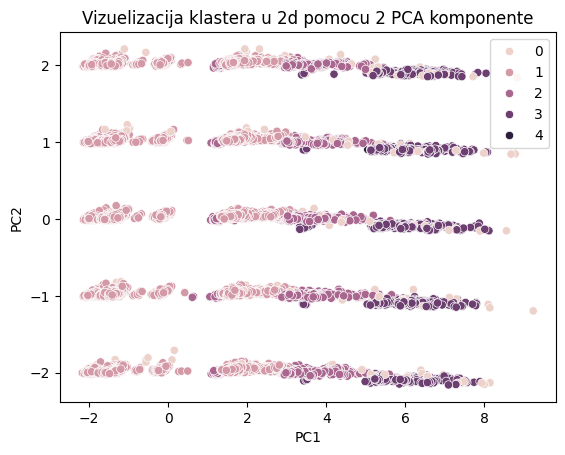

In [83]:
visualise_2d_data(dataset,cluster_labels,4)

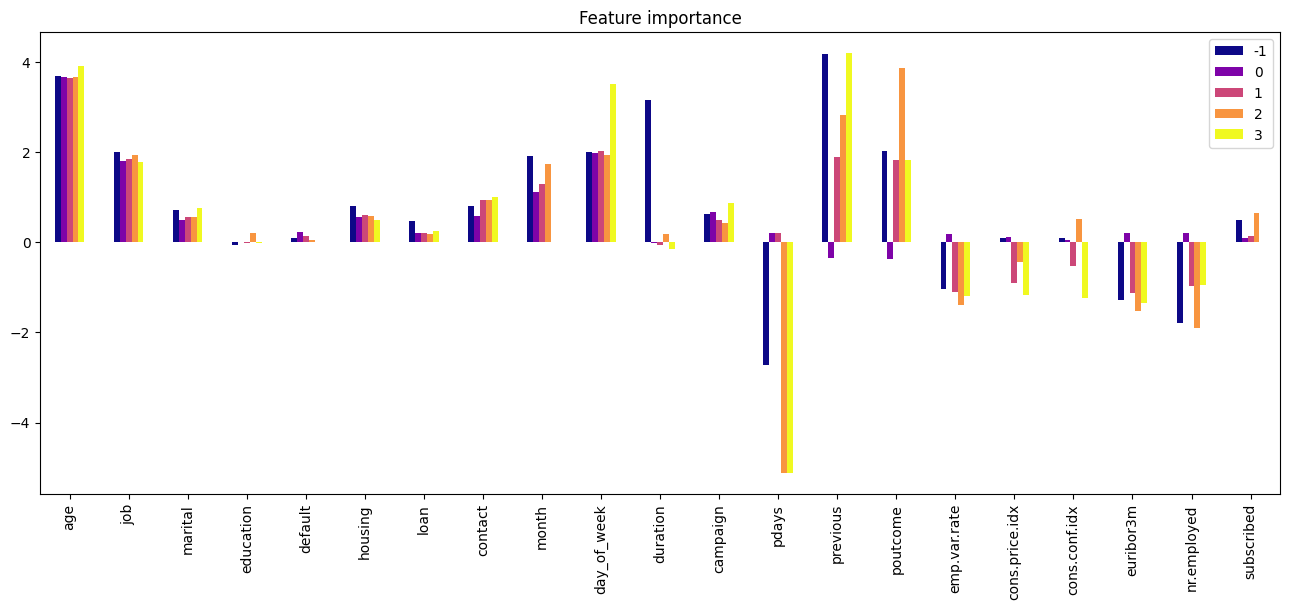

In [84]:
printFeatureImportance(dataset, cluster_labels)

In [85]:
dataset_6 = dataset.copy()
dataset_6.drop(["education","default"],axis =1, inplace = True)
dbscan = DBSCAN(eps = 2.75, n_jobs=-1)
cluster_labels = dbscan.fit_predict(dataset_6)
results = eval_metrics(dataset_6,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df.loc["Najbitnije_DBSCAN",:] = results[0]

Silhouette Score : 0.26144058353883676 Davies-Bouldin Index: 1.719416723737258Calinski-Harabasz Index: 3683.1650027445903


In [86]:
unique_values, counts = np.unique(cluster_labels, return_counts=True)
unique_values

array([-1,  0,  1,  2,  3])

In [87]:
clustering_dataframe["DBSCAN"] = counts[1:5]

In [88]:
results_df

Silhouette Score
KMeans                                   0.171147
Najbitnije_kolone_KMeans                 0.219056
Najbitnije_PCA_KMeans                    0.519875
PCA_KMeans                               0.517224
BisectingKMeans                          0.163576
Najbitnije_BisectingKMeans               0.208447
Najbitnije_PCA_BisectingKMeans           0.515842
PCA_BisectingKMeans                      0.512937
Gaussian Mixture                         0.099755
Najbitnije_Gaussian_Mixture              0.127134
Najbitnije_PCA_Gaussian_Mixture          0.463281
PCA_Gaussian Mixture                     0.465467
DBSCAN                                   0.238946
Najbitnije_DBSCAN                        0.261441

Na osnovu dobijenih tabela zakljucuje se da primena KMeans algoritma za klasterovanje u 4 klastera, daje najbolje rezultate, sa malom razlikom u odnosu na Bisecting KMeans i Gaussian Mixture, sve nad podacima redukovane dimenzionalnosti. KMeans i Gaussian Mixture bice testirani i na drugoj varijanti dataseta.

##Druga varijanta

In [89]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(dataset_2)
results = eval_metrics(dataset_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2 = pd.DataFrame()
results_df_2.loc["KMeans","Silhouette Score"] = results[0]

Silhouette Score : 0.17896779164819634 Davies-Bouldin Index: 1.6419446085231888Calinski-Harabasz Index: 9668.543718253422


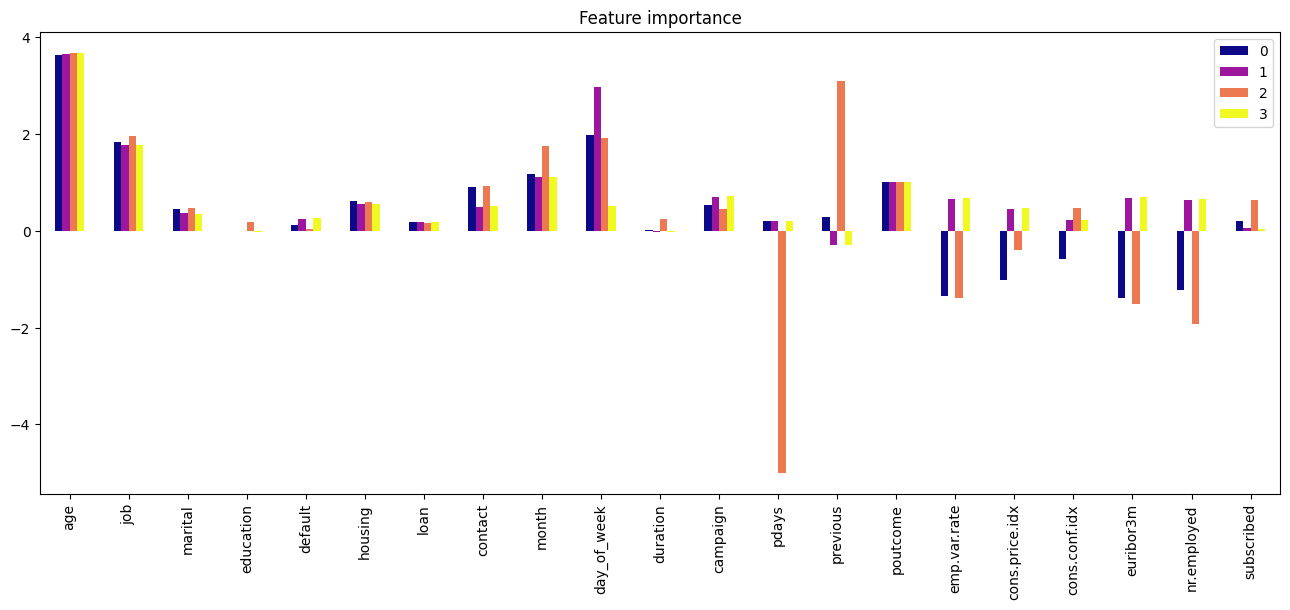

In [90]:
printFeatureImportance(dataset_2, cluster_labels)

In [91]:
results_df_2

Silhouette Score
KMeans          0.178968

In [92]:
dataset_7 = dataset_2.copy()
dataset_7.drop(["education","default","loan","duration"],axis=1,inplace=True)
cluster_labels = kmeans.fit_predict(dataset_7)
results = eval_metrics(dataset_7,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))

results_df_2.loc["Najbitniji_KMeans","Silhouette Score"] = results[0]

Silhouette Score : 0.22921389181397597 Davies-Bouldin Index: 1.3724886463730646Calinski-Harabasz Index: 13398.876434245802


Nakon toga odredjuju se dva glavne komponente sa PCA metodom i vrsi klasterovanje

In [93]:
pcas=PCA(n_components=2).fit_transform(dataset_7)
dataset_7_pca = pd.DataFrame(pcas,columns=['PC1','PC2'])
cluster_labels = kmeans.fit_predict(dataset_7_pca)
results = eval_metrics(dataset_7_pca,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["Najbitnij_PCA_KMeans",:] = results[0]

Silhouette Score : 0.5317631013514027 Davies-Bouldin Index: 0.6930311174539543Calinski-Harabasz Index: 69166.51861998423


Isprobava se i klasteorvanje kad se na polaznom datasetu primenu PCA za dve komponente

In [94]:
pcas=PCA(n_components=2).fit_transform(dataset_2)
df2_2 = pd.DataFrame(pcas,columns=['PC1','PC2'])

In [95]:
kmeans = KMeans(n_clusters =4)
cluster_labels = kmeans.fit_predict(df2_2)
results = eval_metrics(df2_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["PCA_KMeans",:] = results[0]

Silhouette Score : 0.528683096772766 Davies-Bouldin Index: 0.6972179339391866Calinski-Harabasz Index: 68520.94663541534


In [96]:
results_df_2

Silhouette Score
KMeans                        0.178968
Najbitniji_KMeans             0.229214
Najbitnij_PCA_KMeans          0.531763
PCA_KMeans                    0.528683

In [97]:
gmm = GaussianMixture(n_components = 4,random_state=42)
cluster_labels = gmm.fit_predict(dataset_2)
results = eval_metrics(dataset_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["Gaussian Mixture",:] = results[0]

Silhouette Score : 0.1030487632395221 Davies-Bouldin Index: 3.230103287296378Calinski-Harabasz Index: 7266.531334937932


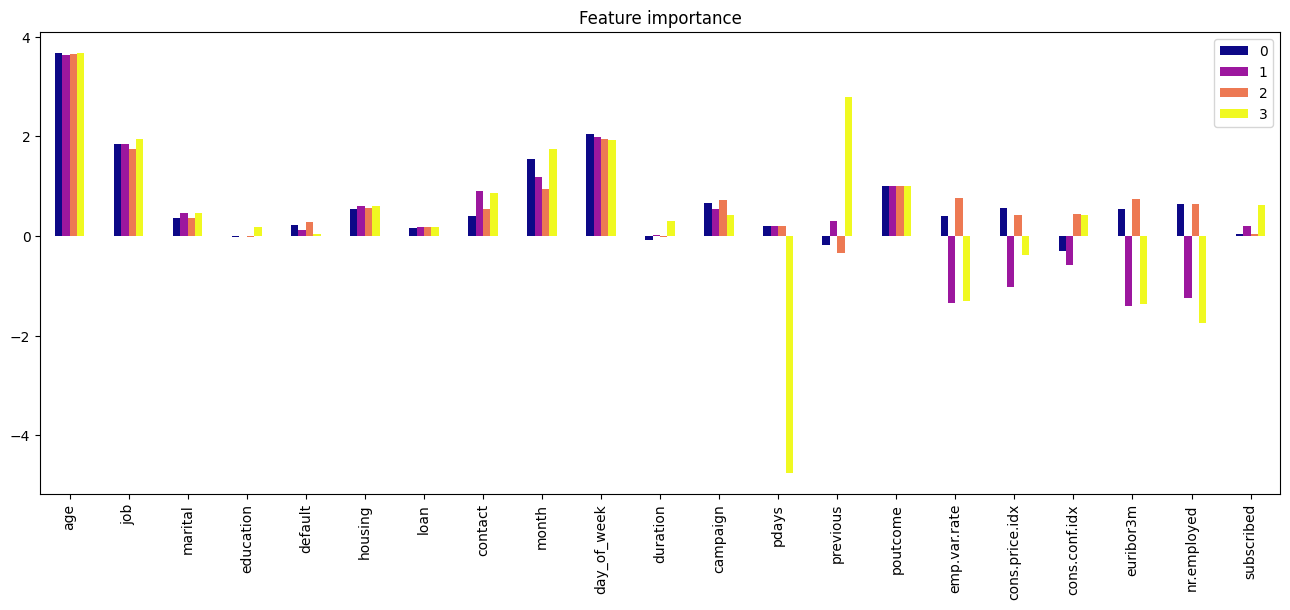

In [98]:
printFeatureImportance(dataset_2, cluster_labels)

In [99]:
dataset_8 = dataset.copy()
dataset_8.drop(["education","default","loan","duration"],axis=1,inplace=True)
cluster_labels = gmm.fit_predict(dataset_8)
results = eval_metrics(dataset_8,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["Najbitniji Gaussian Mixture",:] = results[0]

Silhouette Score : 0.12713395035214892 Davies-Bouldin Index: 2.329832381913431Calinski-Harabasz Index: 10306.446779961354


Vrsi se redukcija dimenzionalnosti PCA metodom

In [100]:
pcas=PCA(n_components=2).fit_transform(dataset_8)
dataset8_pca = pd.DataFrame(pcas,columns=['PC1','PC2'])
cluster_labels = gmm.fit_predict(dataset8_pca)
results = eval_metrics(dataset8_pca,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["Najbitnije PCA Gaussian Mixture",:] = results[0]

Silhouette Score : 0.4632813238707225 Davies-Bouldin Index: 0.6972159173838055Calinski-Harabasz Index: 38306.47270209916


In [101]:
pcas=PCA(n_components=2).fit_transform(dataset_2)
df2_2 = pd.DataFrame(pcas,columns=['PC1','PC2'])
gmm = GaussianMixture(n_components = 4,random_state=42)
cluster_labels = gmm.fit_predict(df2_2)
results = eval_metrics(df2_2,cluster_labels)
print("Silhouette Score : "+str(results[0])+" Davies-Bouldin Index: "+str(results[1])+"Calinski-Harabasz Index: "+str(results[2]))
results_df_2.loc["PCA_Gaussian Mixture",:] = results[0]

Silhouette Score : 0.48757144331932645 Davies-Bouldin Index: 0.7431034423548933Calinski-Harabasz Index: 52093.39213608715


In [102]:
results_df_2

Silhouette Score
KMeans                                   0.178968
Najbitniji_KMeans                        0.229214
Najbitnij_PCA_KMeans                     0.531763
PCA_KMeans                               0.528683
Gaussian Mixture                         0.103049
Najbitniji Gaussian Mixture              0.127134
Najbitnije PCA Gaussian Mixture          0.463281
PCA_Gaussian Mixture                     0.487571

##Rezultati

In [103]:
results_df

Silhouette Score
KMeans                                   0.171147
Najbitnije_kolone_KMeans                 0.219056
Najbitnije_PCA_KMeans                    0.519875
PCA_KMeans                               0.517224
BisectingKMeans                          0.163576
Najbitnije_BisectingKMeans               0.208447
Najbitnije_PCA_BisectingKMeans           0.515842
PCA_BisectingKMeans                      0.512937
Gaussian Mixture                         0.099755
Najbitnije_Gaussian_Mixture              0.127134
Najbitnije_PCA_Gaussian_Mixture          0.463281
PCA_Gaussian Mixture                     0.465467
DBSCAN                                   0.238946
Najbitnije_DBSCAN                        0.261441

In [104]:
results_df_2

Silhouette Score
KMeans                                   0.178968
Najbitniji_KMeans                        0.229214
Najbitnij_PCA_KMeans                     0.531763
PCA_KMeans                               0.528683
Gaussian Mixture                         0.103049
Najbitniji Gaussian Mixture              0.127134
Najbitnije PCA Gaussian Mixture          0.463281
PCA_Gaussian Mixture                     0.487571

Na osnovu dobijenih rezultata moze se zakljuciti da se najveca tacnost postize kada se primeni KMeans algoritam nad podacima redukovane dimenzionalnosti,ali nakon izbacivanja nekoliko kolona, u drugoj varijanti dataseta.

##Analiza

In [105]:
cluster_labels = kmeans.fit_predict(dataset_7_pca)


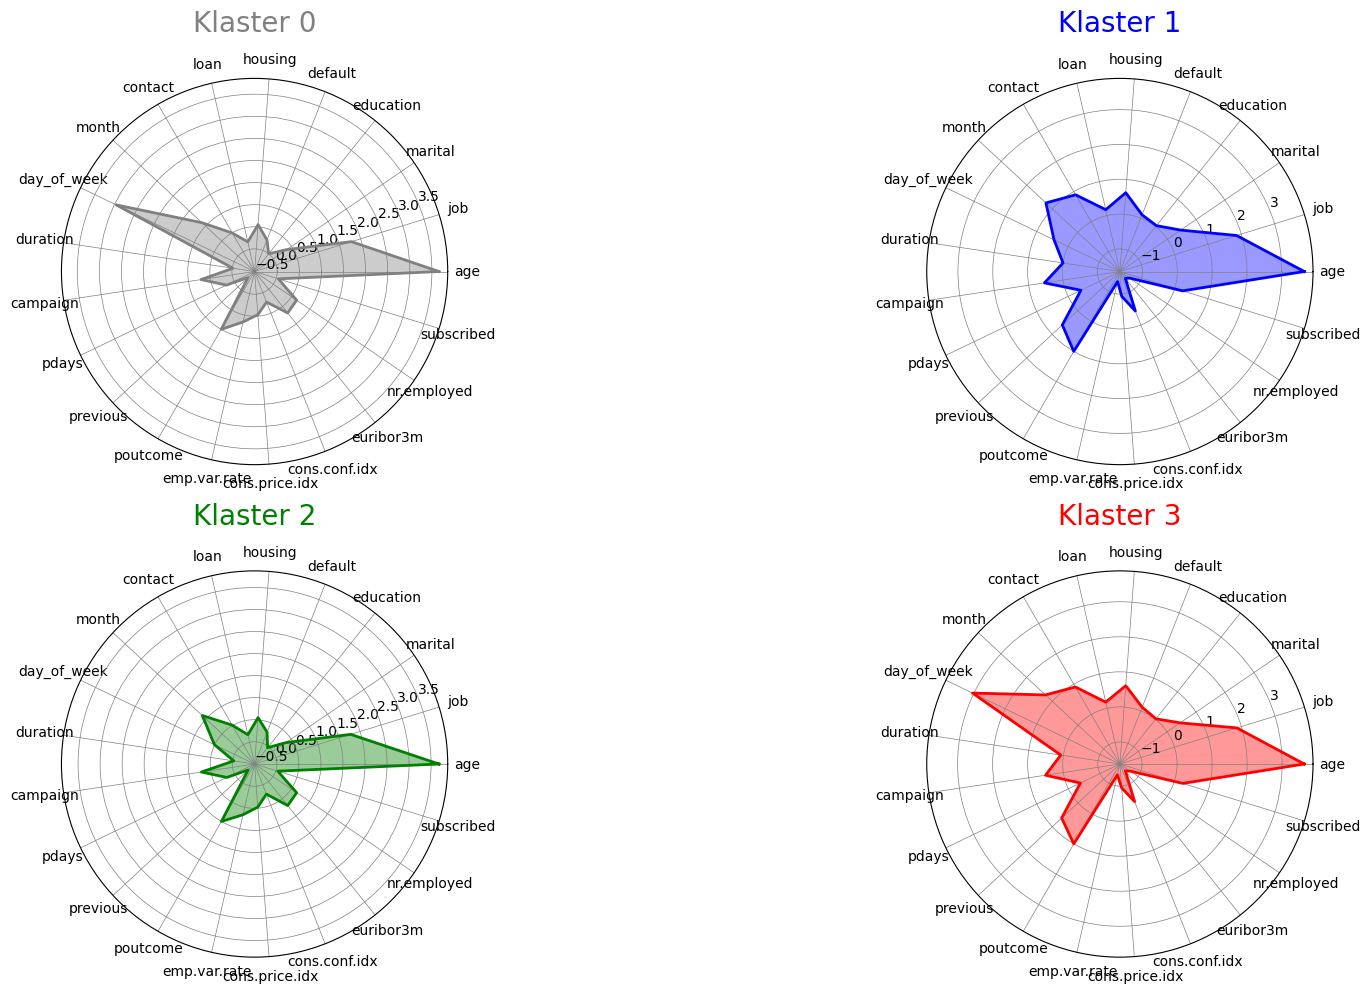

In [106]:
dataset_2["cluster"] = cluster_labels
cluster_centroids = dataset_2.groupby('cluster').mean()

def create_radar_chart(ax, angles, data, color, k):
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    ax.set_title(f'Klaster {k}', size=20, color=color, y=1.1)

labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

num_clusters = len(cluster_centroids)
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=2, subplot_kw=dict(polar=True))

colors = ['gray', 'blue', 'green', 'red']

for i in range(num_clusters):
    row = i // 2
    col = i % 2

    data = cluster_centroids.loc[i].tolist()
    data += data[:1]
    create_radar_chart(ax[row, col], angles, data, colors[i], i)

    ax[row, col].set_xticks(angles[:-1])
    ax[row, col].set_xticklabels(labels[:-1])
    ax[row, col].grid(color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()

Klaster 0:
  

* visoke vrednosti **age**
* umerene vrednosti **month**,**poutcome**,**campaign**,**housing**,**euribor3m**,**nr.employed**,

Predstavlja starije osobe sa umerenom varijabilnošću u mesecu kontakta, ishodima kampanje, situacijama sa stanovanjem i ekonomskim pokazateljima.



Klaster 1:

*   visoka vrednost **age**
*   srednje vrednosti  **duration**,**pdays**,**loan**,**housing**,**education**,**default**,**cons.conf.idx**
*   vece vrednosti **poutcome**, **previous**, **month**, **job**

Sastoji se od osoba starijeg uzrasta, raznovrsnih vrsta poslova i prethodnih ishoda kampanje. Imaju umerenu varijabilnost u statusu kredita, trajanju poziva i nivou obrazovanja

Klaster 2:

*   visoka vrednost **age**,**day_of_week**
*   umerene vrednosti **campaign**,**poutcome**,**housing**,**cons.conf.idx**,**euribor3m**,**housing**

Uključuje osobe koje su češće kontaktirane tokom određenih dana u nedelji. Pokazuju umerenu varijabilnost u ishodima kampanje, situacijama sa stanovanjem i ekonomskim pokazateljima.

Klaster 3:

*   visoka vrednost **age**,**day_of_week**
*   umerene vrednosti **loan**,**duration**,**pdays**,**cons.conf.idx**,**housing**,**default**,**education**
*   vece vrednosti **poutcome**, **previous**, **month**, **job**,**contact**

Sastoji se od osoba starijeg uzrasta, kontaktiranih pretežno tokom određenih dana u nedelji. Pokazuju umerenu varijabilnost u statusu kredita, trajanju poziva i nivou obrazovanja, ali veću varijabilnost u prethodnim ishodima kampanje, vrstama poslova i metodama kontakta.





















  